<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbors Regression
>* 회귀(Regression)란
- K-최근접 이웃 회귀
- 결정계수 (R<sup>2</sup> , Coefficient of Determination)
- Overfitting vs Underfitting

#회귀(Regression)
분류는 몇 개의 클래스 중 하나로 분류하는 문제였다면 회귀는 임의의 어떤 숫자를 예측하는 문제이다.

#K-최근접 이웃 회귀
예측하려는 샘플에 가장 가까운 샘플 K개를 선택하여 타깃값의 평균을 구하는 방법으로 회귀한다.

In [1]:
#데이터 준비
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

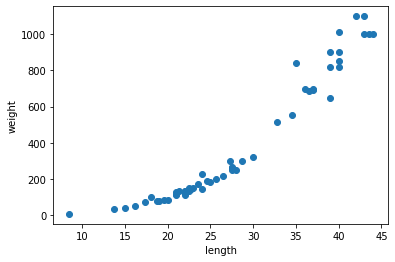

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
#train_set, test_set 준비

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

# 사이킷런에서 모델 학습을 시키기 위해서는 2차원 배열을 사용하여야 한다.
# reshape 메서드를 통해 2차원 배열로 만듬
# -1을 지정하면 나머지 원소 개수로 채우라는 의미로 꼭 배열의 원소 개수를 알지 않아도 된다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


#결정계수 (R<sup>2</sup> , Coefficient of Determination)
>* Classification에서 정확하게 샘플을 분류한 개수를 정확도로 한 것에 반해 Regression에서는 예측하는 값이나 타깃 모두 임의의 수치이기 때문에 <b>결정계수</b>라는 값을 사용한다.
- R<sup>2</sup> = 1 - ((타깃 - 예측)<sup>2</sup>의 합) / (타깃 - 평균)<sup>2</sup>의 합))
- 타깃이 예측에 가까워지면 결정계수 값이 올라가므로 높은 점수를 받는다.
- 타깃이 평균에 가까워지면 분자와 분모가 비슷해져서 낮은 점수를 받는다.

In [9]:
#모델 학습

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() # 모델 생성

knr.fit(train_input, train_target) # 모델 훈련
print(knr.score(test_input, test_target)) # 모델 평가

0.992809406101064


In [10]:
# 결정계수가 직감적으로 얼마나 좋은지 이해하기는 어려움
# 타깃과 예측한 값의 차이를 구해보면 감이 올 수 있음
# 평균 절댓값 오차(Mean Absolute Error)를 구하여 알 수 있음
# 타깃과 예측 값의 절댓값 오차를 평균하여 반환
# 사이킷런 metrics 패키지에 있음

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) # test_input에 대한 predict 값 구함

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

#19.157142857142862g 정도 다르다는 것을 알 수 있다.

19.157142857142862


#Overfitting vs Underfitting

<h2><strong>Overfitting</strong></h2>

>* 과대적합(Overfitting)이란 훈련 세트에서 점수가 굉장히 좋았으나 테스트 세트에서 점수가 현저히 떨어지는 경우
- 즉 훈련세트에만 잘 맞는 모델이라는 것을 의미

<h2><strong>Underfitting</strong></h2>

>* 과소적합(Underfitting)이란 훈련세트보다 테스트세트의 점수가 높거나 두 점수가 모두 낮은 경우를 의미
- 즉 모델이 너무 단순하여 훈련세트에 적절히 훈련되지 않은 경우

In [12]:
# K-최근접 이웃 알고리즘에서 모델을 더 복잡하게 만드는 방법은 이웃의 개수 K를 줄이는 방법이다.
# 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고,
# 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따르기 때문이다.

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 훈련 세트에 대한 점수가 테스트 세트에 대한 점수보다 높고, 큰 차이가 없으므로
# Overfitting이나 Underfitting은 일어나지 않았다고 볼 수 있다.

0.9804899950518966
0.9746459963987609
